<a href="https://www.kaggle.com/code/srishtimishra2512/bees-notebook-resnet50?scriptVersionId=125572326" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pwd

/kaggle/working


**We need to train, test, and validation folders, with each folder containing subfolders of all the classes present in the dataset**

In [3]:
parent_dir = "/kaggle/working"
train_dir = "train"
test_dir = "test"
val_dir = "valid"

#creating train directory
train_path = os.path.join(parent_dir, train_dir)
if not os.path.exists(train_path):
    os.mkdir(train_path)

#creating test directory
test_path = os.path.join(parent_dir, test_dir)
if not os.path.exists(test_path):
    os.mkdir(test_path)
    
#creating val directory
val_path = os.path.join(parent_dir, val_dir)
if not os.path.exists(val_path):
    os.mkdir(val_path)

**Now, we will find out the no. of classes we have in our dataset**

In [4]:
csv_path = '/kaggle/input/honey-bee-annotated-images/bee_data.csv'
df= pd.read_csv(csv_path)
len_df = len(df)
print('length of dataframe',len_df)

length of dataframe 5172


In [5]:
df.head()

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
0,041_066.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1,041_072.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
2,041_073.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
3,041_067.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
4,041_059.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker


**Our target vector here is the health column of the dataframe**

In [6]:
num_classes = len(list(df['health'].unique()))
print('\033[1m'+'No. of target classes in the data: '+ '\033[0m', num_classes)

No. of target classes in the data:  6


In [7]:
print('\033[1m'+'Target classes in the data: '+'\033[0m')
for index, item in enumerate(list(df['health'].unique())):
    print(index+1, item)

Target classes in the data: 
1 hive being robbed
2 healthy
3 few varrao, hive beetles
4 ant problems
5 missing queen
6 Varroa, Small Hive Beetles


(164, 115) RGB
(90, 201) RGB
(167, 132) RGB
(97, 134) RGB
(106, 147) RGB


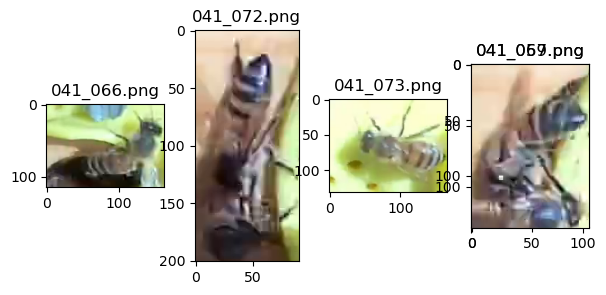

In [8]:
import matplotlib.pyplot as plt
from PIL import Image

input_dir = '/kaggle/input/honey-bee-annotated-images/bee_imgs/bee_imgs'
# this part of the code displays 4 images at a time
fig = plt.figure(figsize=(7, 3))
rows = 1
columns = 4
for index, value in df['file'][:5].items():
    img = Image.open(os.path.join(input_dir, value))
    fig.add_subplot(rows, columns, index+1 if index <4 else index)
    img_name = os.path.basename(value)
    plt.imshow(img)
    plt.title(img_name)
    print(img.size, img.mode)

**Observation**:
1. **Our images are of different sizes, we need to resize them to the same size.**
2. **We have 6 categories within our datset. Therefore, we need to create 6 sub-directories within each train, test, and validation folders corresponding to each of the 6 classes and copy the images.** 

In [9]:
#creating train directory

class_1 = 'hive being robbed'
class_1_dir = os.path.join(train_path, class_1)
if not os.path.exists(class_1_dir):
    os.mkdir(class_1_dir)
    
class_2 = 'healthy'
class_2_dir = os.path.join(train_path, class_2)
if not os.path.exists(class_2_dir):
    os.mkdir(class_2_dir)
    
class_3 = 'few varrao, hive beetles'
class_3_dir = os.path.join(train_path, class_3)
if not os.path.exists(class_3_dir):
    os.mkdir(class_3_dir)
    
class_4 = 'ant problems'
class_4_dir = os.path.join(train_path, class_4)
if not os.path.exists(class_4_dir):
    os.mkdir(class_4_dir)
    
class_5 = 'missing queen'
class_5_dir = os.path.join(train_path, class_5)
if not os.path.exists(class_5_dir):
    os.mkdir(class_5_dir)
    
class_6 = 'Varroa, Small Hive Beetles'
class_6_dir = os.path.join(train_path, class_6)
if not os.path.exists(class_6_dir):
    os.mkdir(class_6_dir)

In [10]:
#creating test directory

class_1 = 'hive being robbed'
class_1_dir = os.path.join(test_path, class_1)
if not os.path.exists(class_1_dir):
    os.mkdir(class_1_dir)
    
class_2 = 'healthy'
class_2_dir = os.path.join(test_path, class_2)
if not os.path.exists(class_2_dir):
    os.mkdir(class_2_dir)
    
class_3 = 'few varrao, hive beetles'
class_3_dir = os.path.join(test_path, class_3)
if not os.path.exists(class_3_dir):
    os.mkdir(class_3_dir)
    
class_4 = 'ant problems'
class_4_dir = os.path.join(test_path, class_4)
if not os.path.exists(class_4_dir):
    os.mkdir(class_4_dir)
    
class_5 = 'missing queen'
class_5_dir = os.path.join(test_path, class_5)
if not os.path.exists(class_5_dir):
    os.mkdir(class_5_dir)
    
class_6 = 'Varroa, Small Hive Beetles'
class_6_dir = os.path.join(test_path, class_6)
if not os.path.exists(class_6_dir):
    os.mkdir(class_6_dir)

In [11]:
#creating validation directory

class_1 = 'hive being robbed'
class_1_dir = os.path.join(val_path, class_1)
if not os.path.exists(class_1_dir):
    os.mkdir(class_1_dir)
    
class_2 = 'healthy'
class_2_dir = os.path.join(val_path, class_2)
if not os.path.exists(class_2_dir):
    os.mkdir(class_2_dir)
    
class_3 = 'few varrao, hive beetles'
class_3_dir = os.path.join(val_path, class_3)
if not os.path.exists(class_3_dir):
    os.mkdir(class_3_dir)
    
class_4 = 'ant problems'
class_4_dir = os.path.join(val_path, class_4)
if not os.path.exists(class_4_dir):
    os.mkdir(class_4_dir)
    
class_5 = 'missing queen'
class_5_dir = os.path.join(val_path, class_5)
if not os.path.exists(class_5_dir):
    os.mkdir(class_5_dir)
    
class_6 = 'Varroa, Small Hive Beetles'
class_6_dir = os.path.join(val_path, class_6)
if not os.path.exists(class_6_dir):
    os.mkdir(class_6_dir)

****Since the kaggle input directory is a read only directory, we need to move the images and the csv file in the working directory in order to be able to make changes to them.****

In [12]:
!cp -r /kaggle/input/honey-bee-annotated-images/ ./ 

**we will update the complete path to the images in the dataframe['file'] column**

In [13]:
images_dir = '/kaggle/working/honey-bee-annotated-images/bee_imgs/bee_imgs'
list_dir = []
for index, row in df.iterrows():
    list_dir.append(os.path.join(images_dir, row['file']))
df['file'] = list_dir
df['file'][1]

'/kaggle/working/honey-bee-annotated-images/bee_imgs/bee_imgs/041_072.png'

In [14]:
df.head()

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
0,/kaggle/working/honey-bee-annotated-images/bee...,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1,/kaggle/working/honey-bee-annotated-images/bee...,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
2,/kaggle/working/honey-bee-annotated-images/bee...,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
3,/kaggle/working/honey-bee-annotated-images/bee...,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
4,/kaggle/working/honey-bee-annotated-images/bee...,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker


In [15]:
for index, value in df['file'].items():
    img = Image.open(value)
    new_img = img.resize((64, 64))
    new_img.save(value)
    #print(new_img.size)

**Now, that the images have been resized, we will move them to their corresponding sub-directories.**

In [16]:
import random 
import shutil
import math

no_images = len_df #no. of total images we have
train_size = math.floor(0.7*no_images) # no. of training images
#print(train_size) #returns 3620 images
test_size = math.floor(0.2*no_images) #testing images
#print(test_size) #returns 1034 images

# list of images in the images directory
images_list = list(df['file'])
random.shuffle(images_list) #shuffling the images so that we get different classes in the train data
#print(images_list[:5])

#creating a random seed to import the same images everytime 
random.seed(10)
train_images = images_list[:train_size]
#print(train_images[:5])
test_images = images_list[train_size: train_size+test_size]
#print(test_images[:5])
val_images = images_list[train_size+test_size:] #use the remaining images in the images list
#print(val_images[:5])
#print(len(val_images)) #returns returning images


for img in train_images: #img is path to images in working directory
    label = df['health'].loc[df['file']==img].to_string(index=False)
    path = os.path.join(train_path, label)
    #print(path)
    shutil.move(img, path)
    

for img in test_images:
    label = df['health'].loc[df['file']==img].to_string(index=False)
    path = os.path.join(test_path, label)
    shutil.move(img, path)
    

for img in val_images:
    label = df['health'].loc[df['file']==img].to_string(index=False)
    path = os.path.join(val_path, label) 
    shutil.move(img, path) 

In [17]:
len(os.listdir('/kaggle/working/train/healthy'))

2384

**Now that we have Dataset prepared, we will apply data transformation to augment our training dataset.**

**Data Augmentation**

In [18]:
import torch 
from torchvision import datasets, models, transforms
import torch.utils.data as data

In [19]:
# Applying Transforms to the Data
image_transforms = { 
    'train': transforms.Compose([
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5],
                             [0.5, 0.5, 0.5])
    ]),
    'valid': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5],
                             [0.5, 0.5, 0.5])
    ]),
    'test': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5],
                             [0.5, 0.5, 0.5])
    ])
}

**Data Loading**

In [20]:
# Load the Data
# train_path, val_path, test_path

# Batch size
bs = 8

# no. of classes = num_classes

# Load Data from folders
dataset = {
    'train': datasets.ImageFolder(root=train_path, transform=image_transforms['train']),
    'valid': datasets.ImageFolder(root=val_path, transform=image_transforms['valid']),
    'test': datasets.ImageFolder(root=test_path, transform=image_transforms['test'])
}

# Size of Data, to be used for calculating Average Loss and Accuracy
dataset_sizes = {
    'train':len(dataset['train']),
    'valid':len(dataset['valid']),
    'test':len(dataset['test'])
}

# Create iterators for the Data loaded using DataLoader module
dataloaders = {
    'train':data.DataLoader(dataset['train'], batch_size=bs, shuffle=True),
    'valid':data.DataLoader(dataset['valid'], batch_size=bs, shuffle=True),
    'test':data.DataLoader(dataset['test'], batch_size=bs, shuffle=True)
}

In [21]:
# Class names or target labels
class_names = dataset['train'].classes
print("Classes:", class_names)
 
# Print the train and validation data sizes
print("Training-set size:",dataset_sizes['train'],
      "\nValidation-set size:", dataset_sizes['valid'])

Classes: ['Varroa, Small Hive Beetles', 'ant problems', 'few varrao, hive beetles', 'healthy', 'hive being robbed', 'missing queen']
Training-set size: 3620 
Validation-set size: 518


**Transfer Learning**

We are going to implement ResNet50 model and train with the bee dataset.

In [22]:
# Load pretrained ResNet50 Model
resnet50 = models.resnet50(pretrained=True)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [23]:
# Freeze model parameters
for param in resnet50.parameters():
    param.requires_grad = False

In [24]:
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

# Set default device as gpu, if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Change the final layer of ResNet50 Model for Transfer Learning
resnet50.fc = nn.Sequential(
    nn.Linear(resnet50.fc.in_features, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, 6), 
    nn.LogSoftmax(dim=1) # For using NLLLoss()
)

# Convert model to be used on GPU
resnet50 = resnet50.to(device)

# Define Optimizer and Loss Function
loss_func = nn.NLLLoss() #Negative Loss Likelihood function useful for classifying multiple classes
optimizer = optim.Adam(resnet50.parameters())

**Training the model**

In [25]:
import time 

In [26]:
epochs = 30

In [27]:
# Learning rate decay
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [28]:
train_losses_list = []
train_acc_list = []
valid_losses_list = []
valid_acc_list = []
for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))
        # Set to training mode
        resnet50.train()
        # Loss and Accuracy within the epoch
        train_loss = 0.0
        train_acc = 0.0
        valid_loss = 0.0
        valid_acc = 0.0
        for i, (inputs, labels) in enumerate(dataloaders['train']):
            inputs = inputs.to(device)
            labels = labels.to(device)
            # Clean existing gradients
            optimizer.zero_grad()
            # Forward pass - compute outputs on input data using the model
            outputs = resnet50(inputs)
            # Compute loss
            loss = loss_func(outputs, labels)
            # Backpropagate the gradients
            loss.backward()
            # Update the parameters
            optimizer.step()
            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)
            #scheduler.step()
            
            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)
            
            
        # Validation - No gradient tracking needed
        with torch.no_grad():
            # Set to evaluation mode
            resnet50.eval()
            # Validation loop
            for j, (inputs, labels) in enumerate(dataloaders['valid']):
                inputs = inputs.to(device)
                labels = labels.to(device)
                # Forward pass - compute outputs on input data using the model
                outputs = resnet50(inputs)
                # Compute loss
                loss = loss_func(outputs, labels)
                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)
                
                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))
                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))
                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)
                
                
        # Find average training loss and accuracy
        avg_train_loss = train_loss/dataset_sizes['train']
        train_losses_list.append(avg_train_loss)
        avg_train_acc = train_acc/float(dataset_sizes['train'])
        train_acc_list.append(avg_train_acc)
        
        # Find average validation loss and accuracy
        avg_valid_loss = valid_loss/dataset_sizes['valid'] 
        valid_losses_list.append(avg_valid_loss)
        avg_valid_acc = valid_acc/float(dataset_sizes['valid'])
        valid_acc_list.append(avg_valid_acc)
        
        epoch_end = time.time()
        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, nttValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc*100, avg_valid_loss, avg_valid_acc*100, epoch_end-epoch_start))


Epoch: 1/30
Epoch : 000, Training: Loss: 0.7928, Accuracy: 71.6851%, nttValidation : Loss : 0.7904, Accuracy: 77.4131%, Time: 15.8806s
Epoch: 2/30
Epoch : 001, Training: Loss: 0.6492, Accuracy: 76.7127%, nttValidation : Loss : 0.9884, Accuracy: 77.7992%, Time: 10.2710s
Epoch: 3/30
Epoch : 002, Training: Loss: 0.6038, Accuracy: 78.6740%, nttValidation : Loss : 0.8374, Accuracy: 79.1506%, Time: 9.8514s
Epoch: 4/30
Epoch : 003, Training: Loss: 0.5689, Accuracy: 79.0884%, nttValidation : Loss : 1.5260, Accuracy: 75.8687%, Time: 9.8428s
Epoch: 5/30
Epoch : 004, Training: Loss: 0.5584, Accuracy: 80.0000%, nttValidation : Loss : 0.8878, Accuracy: 80.8880%, Time: 10.2148s
Epoch: 6/30
Epoch : 005, Training: Loss: 0.5581, Accuracy: 79.1160%, nttValidation : Loss : 1.8506, Accuracy: 75.6757%, Time: 10.0368s
Epoch: 7/30
Epoch : 006, Training: Loss: 0.5490, Accuracy: 79.6961%, nttValidation : Loss : 0.9284, Accuracy: 80.6950%, Time: 9.9201s
Epoch: 8/30
Epoch : 007, Training: Loss: 0.5385, Accuracy:

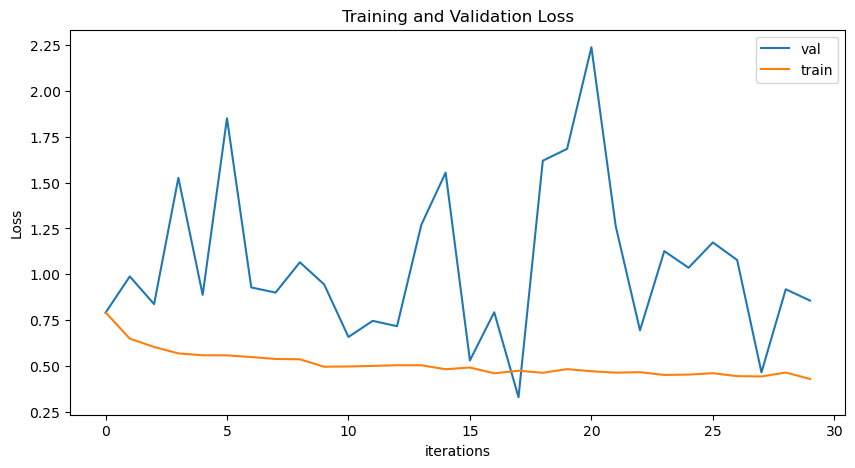

In [29]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss")
plt.plot(valid_losses_list,label="val")
plt.plot(train_losses_list,label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()

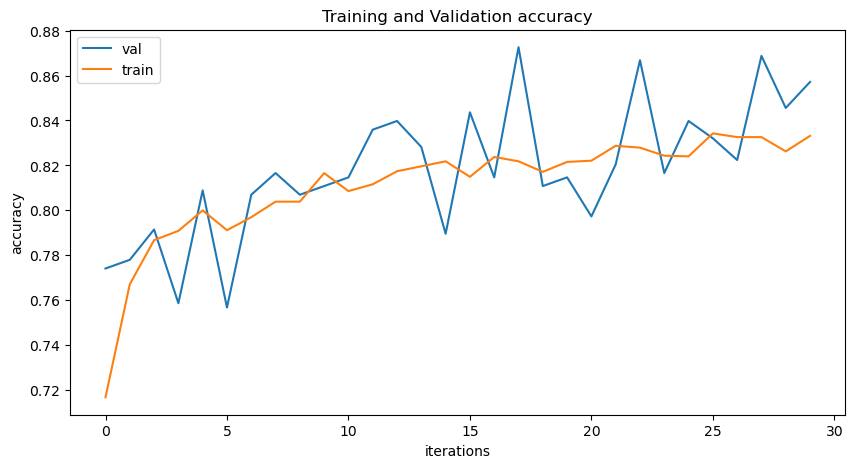

In [30]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation accuracy")
plt.plot(valid_acc_list,label="val")
plt.plot(train_acc_list,label="train")
plt.xlabel("iterations")
plt.ylabel("accuracy")
plt.legend()

Epoch : 029, Training: Loss: 0.3765, Accuracy: 85.7182%, nttValidation : Loss : 0.9199, Accuracy: 84.7490%, Time: 10.5538s

We can see that the training accuracy and validation accuracy are quite high.